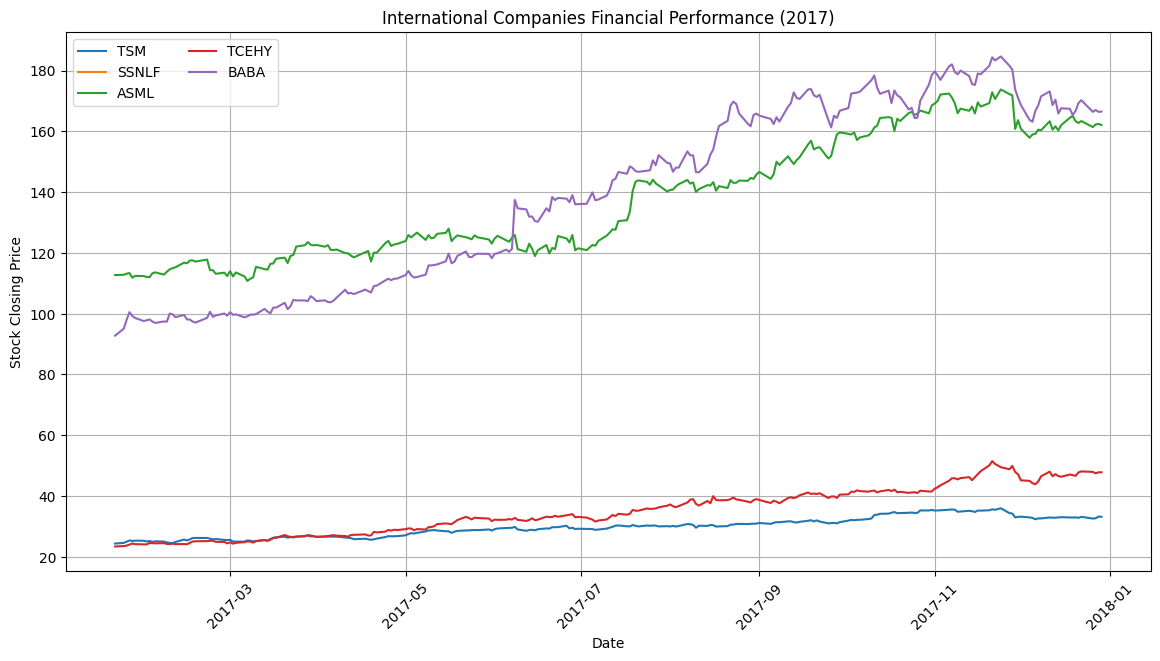

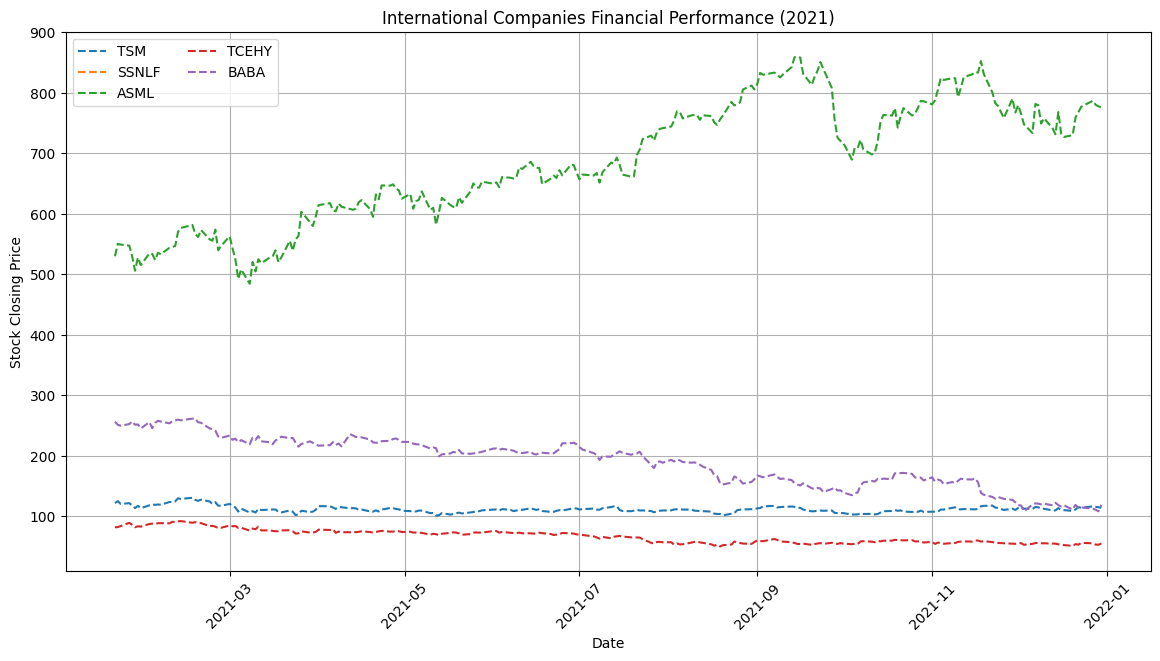

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload JSON files manually
uploaded = files.upload()

# Load JSON files
file_2017 = "Trump.json"
file_2021 = "Biden.json"

with open(file_2017, "r") as f:
    data_2017 = json.load(f)

with open(file_2021, "r") as f:
    data_2021 = json.load(f)

# Selected international companies (including Samsung)
intl_companies_list = ['TSM', 'SSNLF', 'ASML', 'TCEHY', 'BABA']

# Function to extract and clean stock data
def extract_cleaned_companies(data, company_list):
    companies = {}
    for company_ticker in company_list:
        if company_ticker in data[0]:  # Ensure company exists
            stock_data = pd.DataFrame(data[0][company_ticker]["Stock Data"])
            stock_data["Date"] = pd.to_datetime(stock_data["Date"])
            stock_data.set_index("Date", inplace=True)

            # Remove extreme outliers (Samsung has corrupted values)
            if company_ticker == "SSNLF":
                stock_data = stock_data[(stock_data["Close"] > 1) & (stock_data["Close"] < 10000)]
            else:
                stock_data = stock_data[(stock_data["Close"] > 1) & (stock_data["Close"] < 1e6)]

            companies[company_ticker] = stock_data["Close"]
    return companies

# Extract & clean data for selected international companies
intl_companies_2017 = extract_cleaned_companies(data_2017, intl_companies_list)
intl_companies_2021 = extract_cleaned_companies(data_2021, intl_companies_list)

# Plot 2017 Financial Performance
plt.figure(figsize=(14, 7))
for ticker, prices in intl_companies_2017.items():
    plt.plot(prices, label=ticker)

plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.title("International Companies Financial Performance (2017)")
plt.xticks(rotation=45)
plt.legend(ncol=2, loc="upper left")
plt.grid(True)
plt.show()

# Plot 2021 Financial Performance
plt.figure(figsize=(14, 7))
for ticker, prices in intl_companies_2021.items():
    plt.plot(prices, label=ticker, linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.title("International Companies Financial Performance (2021)")
plt.xticks(rotation=45)
plt.legend(ncol=2, loc="upper left")
plt.grid(True)
plt.show()
